In [1]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Dataset path.
csv_path = "https://raw.githubusercontent.com/mejessie/Churn_Prediction-Cell2Cell/main/cell2celltrain.csv"

# Read dataset.
df = pd.read_csv(csv_path)

In [3]:
# Drop unnecessary columns.
df = df.drop(columns = ["CustomerID", "ServiceArea", "PrizmCode", "Occupation", "NonUSTravel", "Homeownership", "HandsetPrice", "MaritalStatus"])

In [4]:
# Drop rows in "Churn" column that are NULL.
df = df.dropna(subset = ["Churn"])

In [5]:
# Encode label of target.
df["Churn"] = df["Churn"].replace({"No" : 0, "Yes" : 1})

C:\Users\Jedsada\AppData\Local\Temp\ipykernel_13884\4188976250.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"No" : 0, "Yes" : 1})


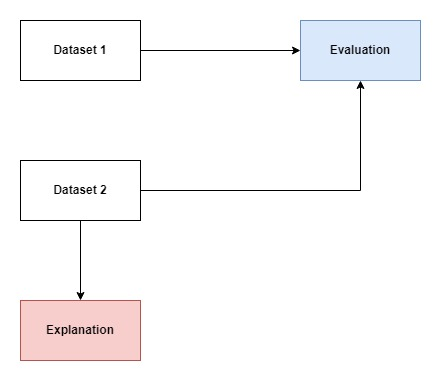

# Dataset 1

In [6]:
# Separate features and target.
X = df.drop(columns = "Churn")
y = df["Churn"]

C:\Users\Jedsada\AppData\Local\Temp\ipykernel_13884\1003035376.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(value, index, na_info[index], va="center")


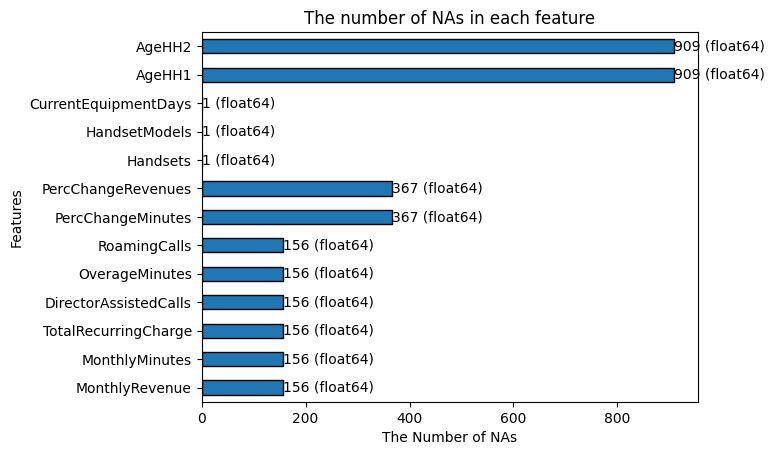

In [7]:
# Calculate the number of NAs in each column.
na_counts = X.isna().sum()

# Get columns that contain any NAs.
na_counts = na_counts[na_counts > 0]

if len(na_counts) != 0:
    # Get data types of columns with NAs.
    dtypes = X.dtypes[na_counts.index]

    # Combine the count of NAs and the dtype into one Series.
    na_info = na_counts.astype(str) + " (" + dtypes.astype(str) + ")"

    # Config barchart.
    na_counts.plot(kind="barh", edgecolor="black")
    plt.title("The number of NAs in each feature")
    plt.xlabel("The Number of NAs")
    plt.ylabel("Features")

    # Annotate the bars with the number of NAs and data type.
    for index, value in enumerate(na_counts):
        plt.text(value, index, na_info[index], va="center")

    # Display the plot.
    plt.show()
else:
    print("No NAs")

In [8]:
# Dummy NA method.

X_ = pd.DataFrame()

# Create new columns that indicate whether the rows in the original columns are NULL.
for columnName in X.columns:
    X_[f"{columnName}_isna"] = X[columnName].isna().astype(int)

# Fill rows that are NULL with zero.
X = X.fillna(0)

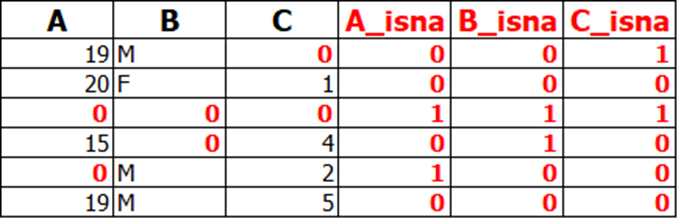

In [9]:
# Scale numerical features.
numericFeatures = X.select_dtypes(include = ["float64", "int64"]).columns
scaler = StandardScaler()
X[numericFeatures] = scaler.fit_transform(X[numericFeatures])

In [10]:
# Convert all categorical values to strings to ensure uniform data type.
categoricalFeatures = X.select_dtypes(include = ["object"]).columns
X[categoricalFeatures] = X[categoricalFeatures].astype(str)

In [11]:
# Display categorical features' info.
for columnName in categoricalFeatures:
  print(columnName, ":", X[columnName].unique())

ChildrenInHH : ['No' 'Yes']
HandsetRefurbished : ['No' 'Yes']
HandsetWebCapable : ['Yes' 'No']
TruckOwner : ['No' 'Yes']
RVOwner : ['No' 'Yes']
BuysViaMailOrder : ['Yes' 'No']
RespondsToMailOffers : ['Yes' 'No']
OptOutMailings : ['No' 'Yes']
OwnsComputer : ['Yes' 'No']
HasCreditCard : ['Yes' 'No']
NewCellphoneUser : ['No' 'Yes']
NotNewCellphoneUser : ['No' 'Yes']
OwnsMotorcycle : ['No' 'Yes']
MadeCallToRetentionTeam : ['Yes' 'No']
CreditRating : ['1-Highest' '4-Medium' '3-Good' '6-VeryLow' '2-High' '5-Low' '7-Lowest']


In [12]:
# Encoding for ordinal features.
X["CreditRating"] = X["CreditRating"].replace({"1-Highest" : 1, "2-High" : 2, "3-Good" : 3, "4-Medium" : 4, "5-Low" : 5, "6-VeryLow" : 6, "7-Lowest" : 7})

C:\Users\Jedsada\AppData\Local\Temp\ipykernel_13884\511498935.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["CreditRating"] = X["CreditRating"].replace({"1-Highest" : 1, "2-High" : 2, "3-Good" : 3, "4-Medium" : 4, "5-Low" : 5, "6-VeryLow" : 6, "7-Lowest" : 7})


In [13]:
# One-hot encode for nominal features.
for columnName in categoricalFeatures:
  X = pd.concat([X, pd.get_dummies(X[columnName], prefix = f"{columnName}_").astype(int)], axis = 1)
  X = X.drop([columnName], axis = 1)

In [14]:
# Merge all DFs together.
df_1 = pd.concat([y, X, X_], axis = 1)
display(df_1)

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,RetentionCalls_isna,RetentionOffersAccepted_isna,NewCellphoneUser_isna,NotNewCellphoneUser_isna,ReferralsMadeBySubscriber_isna,IncomeGroup_isna,OwnsMotorcycle_isna,AdjustmentsToCreditRating_isna,MadeCallToRetentionTeam_isna,CreditRating_isna
0,1,-0.777755,-0.575723,-1.030683,-0.288675,-0.413679,-0.125718,-0.567197,-0.451829,-0.587303,...,0,0,0,0,0,0,0,0,0,0
1,1,-0.935080,-0.970174,-1.239433,-0.401001,-0.413679,-0.125718,0.029093,0.030011,-0.631532,...,0,0,0,0,0,0,0,0,0,0
2,0,-0.463553,-0.973948,-0.362682,-0.401001,-0.413679,-0.125718,0.036888,0.030011,-0.664703,...,0,0,0,0,0,0,0,0,0,0
3,0,0.530223,1.487123,1.182071,0.156136,-0.413679,-0.125718,0.656561,0.235428,5.085049,...,0,0,0,0,0,0,0,0,0,0
4,1,-0.931714,-0.989047,-1.239433,-0.401001,-0.413679,-0.125718,0.044682,0.024939,-0.664703,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,1,-1.316387,-0.989047,-1.949185,-0.401001,-0.413679,-0.125718,0.044682,0.030011,0.363618,...,0,0,0,0,0,0,0,0,0,0
51043,0,0.819513,2.304334,1.599572,0.043810,0.052812,0.353707,0.520155,0.433236,1.181852,...,0,0,0,0,0,0,0,0,0,0
51044,1,-1.316387,-0.989047,-1.949185,-0.401001,-0.413679,-0.125718,0.044682,0.030011,7.263321,...,0,0,0,0,0,0,0,0,0,0
51045,0,-1.316387,-0.989047,-1.949185,-0.401001,-0.413679,-0.125718,0.044682,0.030011,-0.664703,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Remove outliers
# Keep observations where each value <= 3 and >= -3.
df_1 = df_1[((df_1[numericFeatures] <= 3) & (df_1[numericFeatures] >= -3)).all(axis=1)]

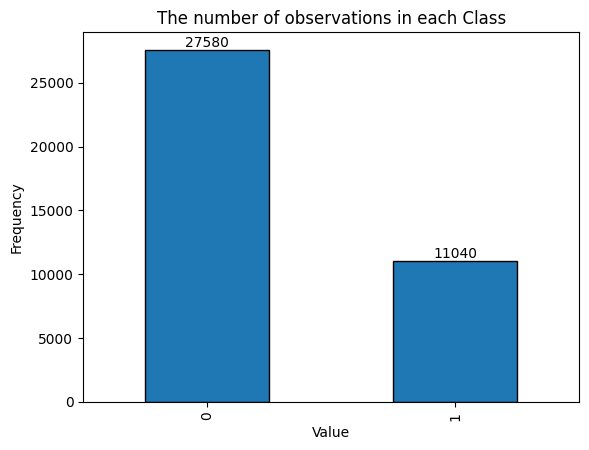

In [16]:
# Count for each class in Target.
counts = df_1["Churn"].value_counts()

# Config barchart.
counts.plot(kind = "bar", edgecolor = "black")
plt.title("The number of observations in each Class")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["0", "1"])

# Annotate the bars with the number of each class in Target.
for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha = "center", va = "bottom")

# Display the plot.
plt.show()

In [17]:
# Drop excess observations.
n_drop = counts[0] - counts[1]
row_indexes = df_1[df_1["Churn"] == 0].sample(n = n_drop).index
df_1 = df_1.drop(row_indexes)

In [18]:
df_1

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,RetentionCalls_isna,RetentionOffersAccepted_isna,NewCellphoneUser_isna,NotNewCellphoneUser_isna,ReferralsMadeBySubscriber_isna,IncomeGroup_isna,OwnsMotorcycle_isna,AdjustmentsToCreditRating_isna,MadeCallToRetentionTeam_isna,CreditRating_isna
156,0,-0.524149,-0.409638,-0.487932,-0.401001,-0.413679,-0.125718,0.839735,0.022403,-0.554131,...,0,0,0,0,0,0,0,0,0,0
175,1,-0.459738,-0.585159,-0.696682,-0.401001,-0.413679,-0.125718,0.831940,0.400268,-0.520960,...,0,0,0,0,0,0,0,0,0,0
194,1,0.620443,-0.207694,1.182071,1.378243,-0.413679,-0.125718,0.777378,0.438308,0.142473,...,0,0,0,0,0,0,0,0,0,0
211,1,-0.219149,-0.904117,0.013069,-0.401001,-0.413679,-0.125718,-0.130697,-0.322493,-0.631532,...,0,0,0,0,0,0,0,0,0,0
235,1,0.137919,-0.085018,0.138319,-0.401001,1.027262,-0.125718,-1.268714,-0.307277,-0.587303,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51033,1,-0.455923,-0.385103,-0.696682,0.043810,-0.195983,-0.125718,-0.212541,-0.180477,0.695334,...,0,0,0,0,0,0,0,0,0,0
51036,0,-1.316387,-0.989047,-1.949185,-0.401001,-0.413679,-0.125718,0.044682,0.030011,0.883307,...,0,0,0,0,0,0,0,0,0,0
51039,0,-0.194237,-0.060483,0.138319,-0.401001,-0.413679,-0.125718,0.044682,0.030011,-0.255586,...,0,0,0,0,0,0,0,0,0,0
51041,1,1.320440,-0.264314,-0.696682,-0.401001,2.177941,-0.125718,0.044682,0.030011,-0.222415,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22080 entries, 156 to 51042
Columns: 119 entries, Churn to CreditRating_isna
dtypes: float64(34), int32(84), int64(1)
memory usage: 13.1 MB


In [20]:
# Free spaces
del X
del y
del X_

# Dataset 2

In [21]:
# Separate features and target.
X = df.drop(columns = "Churn")
y = df["Churn"]

In [22]:
# Fill NA for each column with median.
numericFeatures = X.select_dtypes(include = ["float64", "int64"]).columns
for colName in numericFeatures:
    X[colName] = X[colName].fillna(X[colName].median())

In [23]:
# Scale numerical features.
scaler = StandardScaler()
X[numericFeatures] = scaler.fit_transform(X[numericFeatures])

In [24]:
# Drop NA for categorical features.
categoricalFeatures = X.select_dtypes(include = ["object"]).columns
X[categoricalFeatures] = X[categoricalFeatures].astype(str)
X = X.dropna(subset = categoricalFeatures)

In [25]:
# Display categorical features' info.
for columnName in categoricalFeatures:
  print(columnName, ":", X[columnName].unique())

ChildrenInHH : ['No' 'Yes']
HandsetRefurbished : ['No' 'Yes']
HandsetWebCapable : ['Yes' 'No']
TruckOwner : ['No' 'Yes']
RVOwner : ['No' 'Yes']
BuysViaMailOrder : ['Yes' 'No']
RespondsToMailOffers : ['Yes' 'No']
OptOutMailings : ['No' 'Yes']
OwnsComputer : ['Yes' 'No']
HasCreditCard : ['Yes' 'No']
NewCellphoneUser : ['No' 'Yes']
NotNewCellphoneUser : ['No' 'Yes']
OwnsMotorcycle : ['No' 'Yes']
MadeCallToRetentionTeam : ['Yes' 'No']
CreditRating : ['1-Highest' '4-Medium' '3-Good' '6-VeryLow' '2-High' '5-Low' '7-Lowest']


In [26]:
# Encoding for categorical features.
X[categoricalFeatures] = X[categoricalFeatures].replace({"No" : 0, "Yes" : 1})
X["CreditRating"] = X["CreditRating"].replace({"1-Highest" : 1, "2-High" : 2, "3-Good" : 3, "4-Medium" : 4, "5-Low" : 5, "6-VeryLow" : 6, "7-Lowest" : 7})

C:\Users\Jedsada\AppData\Local\Temp\ipykernel_13884\2337201356.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[categoricalFeatures] = X[categoricalFeatures].replace({"No" : 0, "Yes" : 1})
C:\Users\Jedsada\AppData\Local\Temp\ipykernel_13884\2337201356.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["CreditRating"] = X["CreditRating"].replace({"1-Highest" : 1, "2-High" : 2, "3-Good" : 3, "4-Medium" : 4, "5-Low" : 5, "6-VeryLow" : 6, "7-Lowest" : 7})


In [27]:
# Merge all DFs together.
df_2 = pd.concat([y, X], axis = 1)

In [28]:
# Remove outliers
# Keep observations where each value <= 3 and >= -3.
df_2 = df_2[((df_2[numericFeatures] <= 3) & (df_2[numericFeatures] >= -3)).all(axis=1)]

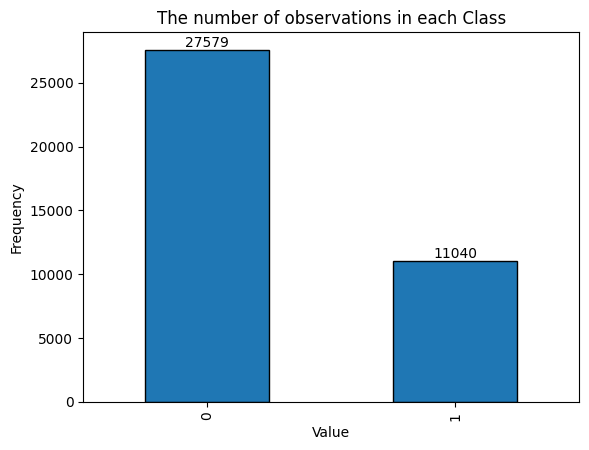

In [29]:
# Count for each class in Target.
counts = df_2["Churn"].value_counts()

# Config barchart.
counts.plot(kind = "bar", edgecolor = "black")
plt.title("The number of observations in each Class")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["0", "1"])

# Annotate the bars with the number of each class in Target.
for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha = "center", va = "bottom")

# Display the plot.
plt.show()

In [30]:
# Drop excess observations.
n_drop = counts[0] - counts[1]
row_indexes = df_2[df_2["Churn"] == 0].sample(n = n_drop).index
df_2 = df_2.drop(row_indexes)

In [31]:
df_2

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating
148,0,0.555711,1.143076,1.183229,-0.401392,-0.102784,-0.095116,0.395583,0.283667,-0.332987,...,-0.180167,-0.1283,0,0,-0.169283,-1.378025,0,-0.140707,0,1
156,0,-0.528836,-0.412311,-0.496569,-0.401392,-0.413790,-0.125718,0.839879,0.022458,-0.554131,...,-0.180167,-0.1283,0,0,-0.169283,0.533896,0,2.469282,0,1
167,0,-0.602639,-0.308366,-0.622554,-0.289052,-0.393056,-0.125718,0.192921,-0.000366,-0.410387,...,-0.180167,-0.1283,0,1,-0.169283,1.489856,0,-0.140707,0,1
175,1,-0.464258,-0.588071,-0.706544,-0.401392,-0.413790,-0.125718,0.832085,0.400323,-0.520960,...,-0.180167,-0.1283,0,1,-0.169283,-1.059371,0,-0.140707,0,3
194,1,0.618714,-0.210092,1.183229,1.378063,-0.413790,-0.125718,0.777522,0.438363,0.142473,...,-0.180167,-0.1283,1,0,-0.169283,0.215243,0,-0.140707,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,0,-0.604889,-0.873446,-1.252478,-0.401392,0.031986,-0.125718,-0.103276,-0.304687,-0.587303,...,-0.180167,-0.1283,0,0,-0.169283,-0.422064,0,-0.140707,0,3
51039,0,-0.198071,-0.062679,0.133355,-0.401392,-0.413790,-0.125718,0.044823,0.030066,-0.255586,...,-0.180167,-0.1283,0,0,-0.169283,-1.378025,0,-0.140707,0,6
51040,0,0.296725,0.375777,0.973254,-0.401392,-0.372322,-0.033913,-0.111071,-0.020654,0.916479,...,-0.180167,-0.1283,0,0,-0.169283,0.852549,0,-0.140707,0,1
51041,1,1.320519,-0.266788,-0.706544,-0.401392,2.177929,-0.125718,0.044823,0.030066,-0.222415,...,-0.180167,-0.1283,0,0,-0.169283,-0.740718,0,-0.140707,0,5


In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22080 entries, 148 to 51042
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      22080 non-null  int64  
 1   MonthlyRevenue             22080 non-null  float64
 2   MonthlyMinutes             22080 non-null  float64
 3   TotalRecurringCharge       22080 non-null  float64
 4   DirectorAssistedCalls      22080 non-null  float64
 5   OverageMinutes             22080 non-null  float64
 6   RoamingCalls               22080 non-null  float64
 7   PercChangeMinutes          22080 non-null  float64
 8   PercChangeRevenues         22080 non-null  float64
 9   DroppedCalls               22080 non-null  float64
 10  BlockedCalls               22080 non-null  float64
 11  UnansweredCalls            22080 non-null  float64
 12  CustomerCareCalls          22080 non-null  float64
 13  ThreewayCalls              22080 non-null  float6

In [33]:
# Free spaces
del X
del y

# Machine Learning Modeling

In [34]:
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model libaries.
import tensorflow as tf
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Shuffle DFs.
shuffled_df_1 = df_1.sample(frac = 1).reset_index(drop = True)
shuffled_df_2 = df_1.sample(frac = 1).reset_index(drop = True)

# Split each DF into 4 parts.
split_df_1 = np.array_split(shuffled_df_1, 4)
split_df_2 = np.array_split(shuffled_df_2, 4)

C:\Users\Jedsada\anaconda3\envs\churn\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [36]:
# KFold
def kfold(split_df, model, name):
    stats = {"name" : name,
        "accuracy" : 0,
        "precision_1" : 0,
        "recall_1" : 0,
        "f1_1" : 0
    }

    k = len(split_df)
    for i in range(k):
        # Select properly folds.
        df_train = pd.concat([split_df[j] for j in range(k) if j != i])
        df_test = split_df[i]
        
        X_train = df_train.iloc[:, 1:]
        y_train = df_train.iloc[:, 0]

        X_test = df_test.iloc[:, 1:]
        y_test = df_test.iloc[:, 0]
        
        model.fit(X_train, y_train)
        
        # Predict the classes.
        y_pred = model.predict(X_test)
        
        # Calculate Accuracy.
        accuracy = accuracy_score(y_test, y_pred)
        stats["accuracy"] += accuracy

        # Calculate Precision.
        precision = precision_score(y_test, y_pred, pos_label=1, average=None, zero_division = 0)
        stats["precision_1"] += precision[1]

        # Calculate Recall.
        recall = recall_score(y_test, y_pred, pos_label=1, average=None, zero_division = 0)
        stats["recall_1"] += recall[1]


        # Calculate F1 Score.
        f1 = f1_score(y_test, y_pred, pos_label=1, average=None, zero_division = 0)
        stats["f1_1"] += f1[1]

    stats["accuracy"] /= k
    stats["precision_1"] /= k
    stats["recall_1"] /= k
    stats["f1_1"] /= k

    return stats

In [37]:
# ANN + KFold
def ann_kfold(split_df, name):
    stats = {"name": name,
        "accuracy": 0,
        "precision_1": 0,
        "recall_1": 0,
        "f1_1": 0
    }

    input_shape = split_df[0].shape[1] - 1  # Number of features (excluding target column)
    ann = tf.keras.Sequential([
        tf.keras.layers.Input(shape = (input_shape,)),
        tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
        tf.keras.layers.Dense(units = 64, activation = tf.nn.relu),
        tf.keras.layers.Dense(units = 1, activation = tf.nn.sigmoid)
    ])

    ann.compile(optimizer = "adam", loss = "binary_crossentropy")

    k = len(split_df)
    for i in range(k):
        # Select properly folds.
        df_train = pd.concat([split_df[j] for j in range(k) if j != i])
        df_test = split_df[i]
        
        X_train = df_train.iloc[:, 1:]
        y_train = df_train.iloc[:, 0]

        X_test = df_test.iloc[:, 1:]
        y_test = df_test.iloc[:, 0]

        ann.fit(X_train, y_train, epochs = 100, verbose = 0)

        # Predict the classes.
        y_pred = (ann.predict(X_test) > 0.5).astype("int32")

        # Calculate Accuracy.
        accuracy = accuracy_score(y_test, y_pred)
        stats["accuracy"] += accuracy

        # Calculate Precision
        precision = precision_score(y_test, y_pred, pos_label=1, average = None, zero_division = 0)
        stats["precision_1"] += precision[1]

        # Calculate Recall.
        recall = recall_score(y_test, y_pred, pos_label=1, average = None, zero_division = 0)
        stats["recall_1"] += recall[1]

        # Calculate F1 Score.
        f1 = f1_score(y_test, y_pred, pos_label=1, average = None, zero_division = 0)
        stats["f1_1"] += f1[1]

    stats["accuracy"] /= k
    stats["precision_1"] /= k
    stats["recall_1"] /= k
    stats["f1_1"] /= k

    return stats

## Evaluation df_1

In [38]:
df_1_scores = []

In [39]:
%%time
df_1_scores.append(ann_kfold(split_df_1, "ANN"))

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
CPU times: total: 9min 3s
Wall time: 5min 33s


In [40]:
%%time
df_1_scores.append(kfold(split_df_1, LogisticRegression(solver = "lbfgs", max_iter = 1000), "Logistic"))

CPU times: total: 5.31 s
Wall time: 1.17 s


In [41]:
%%time
df_1_scores.append(kfold(split_df_1, SGDClassifier(loss = "hinge", penalty = "l2"), "SGD Classifier"))

CPU times: total: 2.08 s
Wall time: 2.08 s


In [42]:
%%time
df_1_scores.append(kfold(split_df_1, KNeighborsClassifier(171), "KNN"))

CPU times: total: 12.3 s
Wall time: 4.35 s


In [43]:
%%time
df_1_scores.append(kfold(split_df_1, SVC(kernel = "linear", C = 0.00001), "SVC Linear"))

CPU times: total: 3min 3s
Wall time: 3min 3s


In [44]:
%%time
df_1_scores.append(kfold(split_df_1, SVC(kernel = "poly", degree = 3, C = 0.01), "SVC Poly"))

CPU times: total: 3min 7s
Wall time: 3min 8s


In [45]:
%%time
df_1_scores.append(kfold(split_df_1, SVC(kernel = "rbf", C = 0.01, gamma = "auto"), "SVC RBF"))

CPU times: total: 3min 59s
Wall time: 3min 59s


In [46]:
%%time
df_1_scores.append(kfold(split_df_1, DecisionTreeClassifier(), "Decision Tree"))

CPU times: total: 2.22 s
Wall time: 2.22 s


In [47]:
%%time
df_1_scores.append(kfold(split_df_1, RandomForestClassifier(n_estimators=100, random_state = 9, n_jobs = -1), "Random Forest"))

CPU times: total: 37.6 s
Wall time: 5.64 s


## Evaluation df_2

In [48]:
df_2_scores = []

In [49]:
%%time
df_2_scores.append(ann_kfold(split_df_2, "ANN"))

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
CPU times: total: 8min 54s
Wall time: 5min 27s


In [50]:
%%time
df_2_scores.append(kfold(split_df_2, LogisticRegression(solver = "lbfgs", max_iter = 1000), "Logistic"))

CPU times: total: 4.86 s
Wall time: 1.1 s


In [51]:
%%time
df_2_scores.append(kfold(split_df_2, SGDClassifier(loss = "hinge", penalty = "l2"), "SGD Classifier"))

CPU times: total: 2.09 s
Wall time: 2.09 s


In [52]:
%%time
df_2_scores.append(kfold(split_df_2, KNeighborsClassifier(171), "KNN"))

CPU times: total: 13.2 s
Wall time: 4.47 s


In [53]:
%%time
df_2_scores.append(kfold(split_df_2, SVC(kernel = "linear", C = 0.00001), "SVC Linear"))

CPU times: total: 3min 6s
Wall time: 3min 6s


In [54]:
%%time
df_2_scores.append(kfold(split_df_2, SVC(kernel = "poly", degree = 3, C = 0.01), "SVC Poly"))

CPU times: total: 3min 10s
Wall time: 3min 10s


In [55]:
%%time
df_2_scores.append(kfold(split_df_2, SVC(kernel = "rbf", C = 0.01, gamma = "auto"), "SVC RBF"))

CPU times: total: 4min 2s
Wall time: 4min 2s


In [56]:
%%time
df_2_scores.append(kfold(split_df_2, DecisionTreeClassifier(), "Decision Tree"))

CPU times: total: 2.16 s
Wall time: 2.15 s


In [57]:
%%time
df_2_scores.append(kfold(split_df_2, RandomForestClassifier(n_estimators=100, random_state = 9, n_jobs = -1), "Random Forest"))

CPU times: total: 38 s
Wall time: 5.68 s


## Performance Tables

In [58]:
pd.DataFrame(df_1_scores).round(2)

,name,accuracy,precision_1,recall_1,f1_1
0,ANN,0.71,0.72,0.68,0.70
1,Logistic,0.58,0.58,0.59,0.58
2,SGD Classifier,0.57,0.57,0.62,0.59
3,KNN,0.57,0.58,0.51,0.54
4,SVC Linear,0.51,0.26,0.41,0.31
5,SVC Poly,0.56,0.59,0.39,0.47
6,SVC RBF,0.56,0.57,0.50,0.53
7,Decision Tree,0.55,0.55,0.55,0.55
8,Random Forest,0.61,0.60,0.62,0.61


In [59]:
pd.DataFrame(df_2_scores).round(2)

,name,accuracy,precision_1,recall_1,f1_1
0,ANN,0.70,0.69,0.72,0.71
1,Logistic,0.58,0.58,0.59,0.59
2,SGD Classifier,0.56,0.57,0.49,0.51
3,KNN,0.57,0.58,0.51,0.54
4,SVC Linear,0.50,0.25,0.50,0.33
5,SVC Poly,0.56,0.59,0.39,0.47
6,SVC RBF,0.56,0.57,0.50,0.53
7,Decision Tree,0.55,0.55,0.55,0.55
8,Random Forest,0.60,0.60,0.61,0.61


# Machine Learning Explanation with SHAP

In [35]:
import shap
from sklearn.model_selection import train_test_split

C:\Users\Jedsada\anaconda3\envs\churn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
# Split DF into test and train.
y = df_2["Churn"]
X = pd.DataFrame(df_2.drop(columns = ["Churn"]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [37]:
# Training and testing
ann = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X.shape[1],)),
    tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 64, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 1, activation = tf.nn.sigmoid)
])

ann.compile(optimizer = "adam", loss = "binary_crossentropy")

ann.fit(X_train, y_train, epochs = 100, verbose = 0)

predicted_y = ann.predict(X_test)

207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [38]:
n_train = 128

# Train explainer.
explainer = shap.KernelExplainer(ann.predict, X_train[:n_train])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Using 128 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [39]:
n_test = 30

# Calculate SHAP values.
shap_values = explainer.shap_values(X_test[:n_test])

  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


  3%|██▊                                                                                | 1/30 [00:19<09:33, 19.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


  7%|█████▌                                                                             | 2/30 [00:38<09:03, 19.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


 10%|████████▎                                                                          | 3/30 [01:01<09:25, 20.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


 13%|███████████                                                                        | 4/30 [01:20<08:42, 20.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


 17%|█████████████▊                                                                     | 5/30 [01:38<08:05, 19.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


 20%|████████████████▌                                                                  | 6/30 [01:59<07:58, 19.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


 23%|███████████████████▎                                                               | 7/30 [02:17<07:22, 19.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 27%|██████████████████████▏                                                            | 8/30 [02:35<06:53, 18.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


 30%|████████████████████████▉                                                          | 9/30 [02:55<06:44, 19.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


 33%|███████████████████████████▎                                                      | 10/30 [03:14<06:21, 19.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


 37%|██████████████████████████████                                                    | 11/30 [03:32<06:00, 18.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


 40%|████████████████████████████████▊                                                 | 12/30 [03:52<05:46, 19.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


 43%|███████████████████████████████████▌                                              | 13/30 [04:11<05:24, 19.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


 47%|██████████████████████████████████████▎                                           | 14/30 [04:30<05:06, 19.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


 50%|█████████████████████████████████████████                                         | 15/30 [04:49<04:42, 18.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 53%|███████████████████████████████████████████▋                                      | 16/30 [05:06<04:16, 18.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 57%|██████████████████████████████████████████████▍                                   | 17/30 [05:22<03:50, 17.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 60%|█████████████████████████████████████████████████▏                                | 18/30 [05:39<03:29, 17.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 63%|███████████████████████████████████████████████████▉                              | 19/30 [05:57<03:13, 17.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [06:14<02:53, 17.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [06:29<02:30, 16.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [06:47<02:18, 17.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [07:06<02:03, 17.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [07:24<01:47, 17.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [07:48<01:37, 19.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [08:09<01:20, 20.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [08:31<01:01, 20.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [08:48<00:39, 19.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [09:06<00:18, 18.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8552/8552 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [09:23<00:00, 18.79s/it]


In [40]:
# Compare probabilities for both predicted_y and predicted_y_shap.
pred_y_main = predicted_y[:n_test].flatten()
pred_y_shap = (np.sum(shap_values, axis = 1) + explainer.expected_value).flatten()
pd.DataFrame({"predicted_y_main" : pred_y_main, "predicted_y_shap" : pred_y_shap})

,predicted_y_main,predicted_y_shap
0,1.000000,1.000000
1,0.000007,0.000007
2,0.982820,0.982820
3,0.995481,0.995481
4,0.557509,0.557509
5,0.988704,0.988704
6,0.999938,0.999938
7,0.000004,0.000004
8,0.000276,0.000276
9,0.777037,0.777037


In [41]:
# Calculate total errors between both predicted_y and predicted_y_shap.
mae_main_shap = np.mean(np.abs(pred_y_main - pred_y_shap))
print(f"{mae_main_shap:.10f}")

0.0000000453


In [42]:
# Explain an observation.
explanation = [shap.Explanation(
    values = np.array(shap_values[i]).flatten(),
    base_values = explainer.expected_value,
    feature_names = X.columns
) for i in range(n_test)]

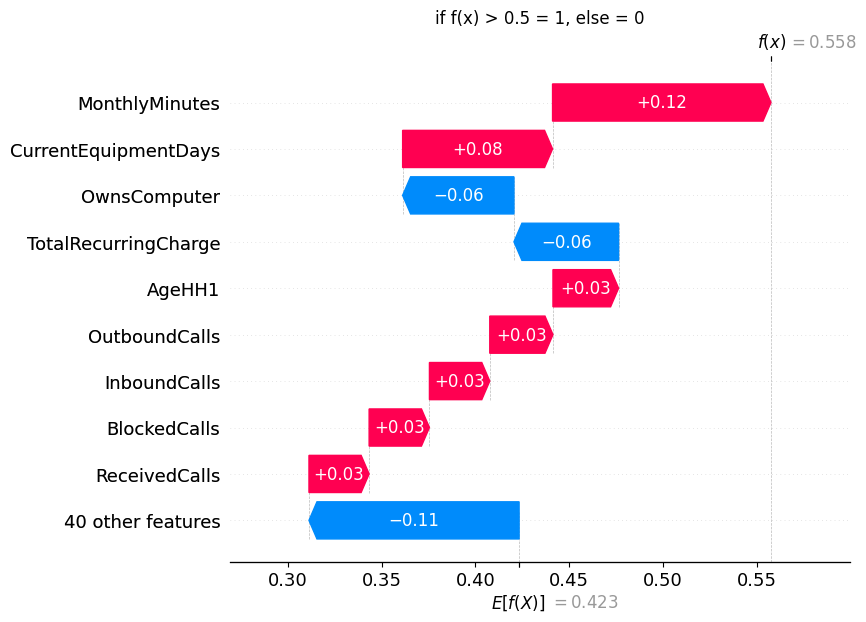

In [48]:
# Plot waterfall plot for a sample observation.
plt.title("if f(x) > 0.5 = 1, else = 0")
shap.waterfall_plot(explanation[4])
plt.show()

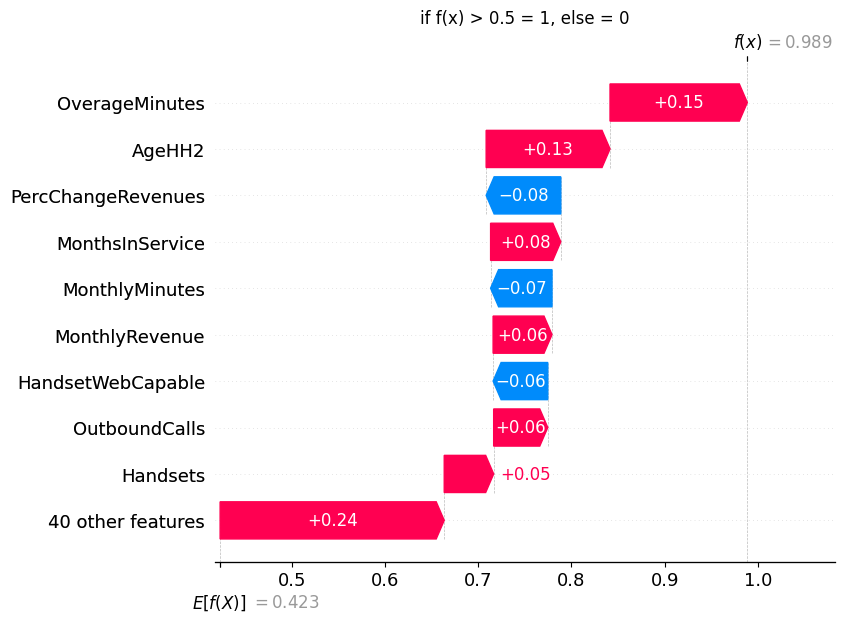

In [49]:
# Plot waterfall plot for a sample observation.
plt.title("if f(x) > 0.5 = 1, else = 0")
shap.waterfall_plot(explanation[5])
plt.show()

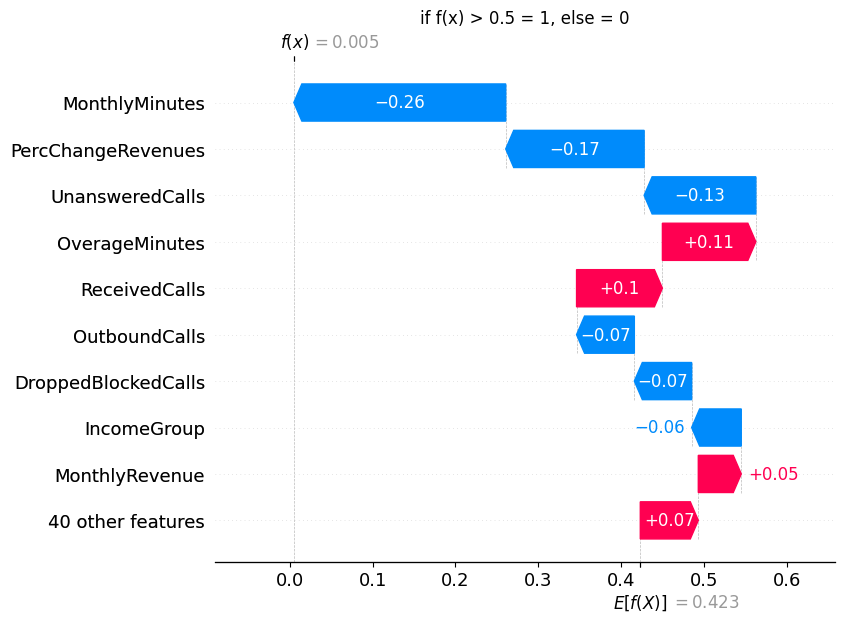

In [55]:
# Plot waterfall plot for a sample observation.
plt.title("if f(x) > 0.5 = 1, else = 0")
shap.waterfall_plot(explanation[11])
plt.show()

In [47]:
# Feature importance.
X_scores = pd.DataFrame([i.values for i in explanation], columns = X.columns).sum()
X_importance = X_scores.abs().nlargest(10).to_dict()

for key in X_importance.keys():
    X_importance[key] = X_scores[key]

print("=== Feature Importance for 30 Samples ===")
for key, item in X_importance.items():
    print(key, "=", item)

=== Feature Importance for 30 Samples ===
HandsetModels = 0.6278996848372594
MonthsInService = 0.5860494318695036
MonthlyMinutes = -0.5664586198637948
OverageMinutes = 0.5427170379841217
HasCreditCard = 0.4817591046351038
BlockedCalls = 0.44822852506625843
PercChangeMinutes = -0.39390872727960485
UniqueSubs = 0.38379398642812484
Handsets = 0.3241551782713379
TotalRecurringCharge = 0.297331737579905
